# Data Cleaning
Data is messy. The vast majority, some say as much as 90%, of a Data Scientist's time is spent cleaning data.

<img src="https://www.cleanarte.com/wp-content/uploads/2020/10/Regular-House-Cleaning-1.jpg" width="80%"/>

There are many tools and techniques for cleaning data, and one that is not only very useful, but also fundamental to computation is **regular expressions**. Regular expressions are used for pattern matching and are a quick and fun way to find and fix messy data.

You can do so much with regular expressions, and for fun, we'll show you not only how to clean data with them, but to use regular expressions to make a ChatBot!



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Regular Expressions (RegEx)
**Regular Expressions** are simple yet powerful pattern matching "mini programs" that almost every language or application that deals with textual data supports. You can test your regular expressions using online testing tools, such as: https://regexr.com/.

We will learn about regular expressions to do:

1.   Data Cleaning
2.   Chatbots!


## Data Cleaning: Regular expressions in Google Sheets
Google Sheets has a **regexreplace** function. Try the following Google Sheet to play with regex: https://docs.google.com/spreadsheets/d/1HwAIK_U-p2SbgonV-vPWkxtTGc-tAal7Nx3YHFjEvrQ/edit?usp=sharing

Clean the code in large chunks by applying patterns, such as:

```
=REGEXREPLACE(D2, "[Ff]emale", "FEMALE")
```

That pattern will match "female" or "Female" and replace it with simply "FEMALE" -- which will in effect normalize that data and make it uniform. 

But it would NOT match "male" since it's looking for the "fe" part as well.

We have to be careful! Because if we do it in reverse, that is, replace "[Mm]ale" with male, it will do somethig strange. 

What do you think it will result for that replacement on "Female"? Let's try it!

In [ ]:
import pandas as pd

df = pd.read_csv('/content/sample_data/attendance1anon - attendance1anon (2).csv')
df.head(5)

,What school are you from?,What grade will you be this Fall?,"Please remember to download the waiver, have your parent sign it tonight, and have a digital copy ready for upload on Wednesday.",With what gender do you identify?,GENDER-fix-FEMALE,GENDER-fix-MALE,With what race(s) and ethnicity do you identify?,Secret Code,Comments
0,Park view middle school,9,I promise I will remember.,Male,Male,MALE,Asian,NaN,NaN
1,North Hollywood HS,11,I promise I will remember.,Male,Male,MALE,White,NaN,NaN
2,Summit High School,10,I promise I will remember.,Male,Male,MALE,Asian (Chinese),NaN,None
3,North Hollywood HS,11,I promise I will remember.,Male,Male,MALE,White,Goat,NaN
4,West High,12,I promise I will remember.,male,male,MALE,Asian - Indian,GOAT,NaN


### Before: gender is messy

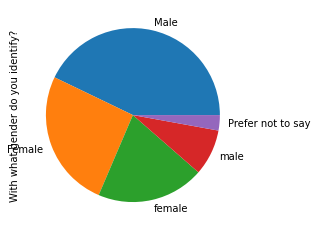

In [ ]:
df["With what gender do you identify?"].value_counts().plot(kind="pie")

### After fixing FEMALE

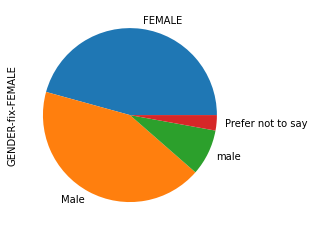

In [ ]:
df["GENDER-fix-FEMALE"].value_counts().plot(kind="pie")

### After fixing MALE

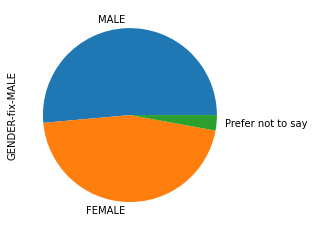

In [ ]:
df["GENDER-fix-MALE"].value_counts().plot(kind="pie")

## Data Cleaning: Regular Expressions in Pandas
Python and Pandas also support **regular expressions**. So, rather than switching to Google Sheets, we can actually avoid all that and use code directly! Python regular expression library docs are here: https://docs.python.org/3/library/re.html.

The important thing to remember, with Pandas dataframes, we can operate on entire vectors or matrices all at once. Behind the scenes, you can imagine it is simply looping over the data range for you. Technically, this is called "applying" a function across the dataframe.

What may be confusing, even though we are writing Python code, the "replace" function is coming from Pandas, so it's Panda's particular version of regular expressions. Doh!

### Before: gender is messy

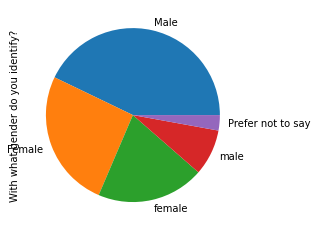

In [ ]:
df["With what gender do you identify?"].value_counts().plot(kind="pie")

### After fixing FEMALE

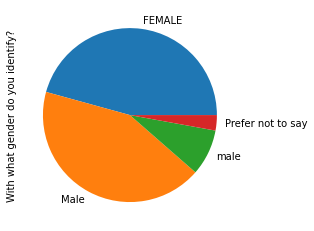

In [ ]:
df["With what gender do you identify?"] = df["With what gender do you identify?"].replace("\s*[Ff]emale\s*", "FEMALE", regex=True)
df["With what gender do you identify?"].value_counts().plot(kind="pie")


### After fixing MALE

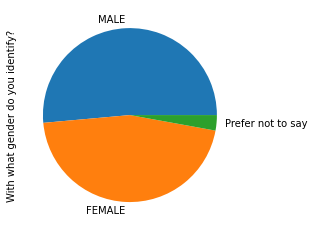

In [ ]:
df["With what gender do you identify?"] = df["With what gender do you identify?"].replace("\s*[Mm]ale\s*", "MALE", regex=True)
df["With what gender do you identify?"].value_counts().plot(kind="pie")

# Review: unstructured data visualization
Wordclouds.

In [ ]:
!pip install wordcloud

In [ ]:
# Allows you to work with directories
from os import path

# Module to work with images
from PIL import Image

# Scientific Computation and Linear Algebra for Python
import numpy as np

# Module to graph things out
import matplotlib.pyplot as plt

# The specific module we will need to generate Word Clouds!
from wordcloud import WordCloud, STOPWORDS

In [ ]:
homelessness_data = pd.read_csv('/content/sample_data/Copy of 2020_PIT_final_data - deduped_data - scrubbed (2).csv')
homelessness_data.head(5)


,ObjectID,GlobalID,First_Name_Initial,Last_Name_Initial,Relationship_To_HoH,Age_As_Of_Today,Ethnicity,Race,Gender,Birth_City,Birth_State,Birth_State_Other,First_Time_Homeless,Length_Of_Stay,Times_Homeless_Past_Three_Years,Months_Homeless_Past_Three_Year,Contributing_Factors,Contributing_Factors_Other,Companion_Animal,Number_of_Animal,Pet_Housing,Pregnancy_Status,Expectant_Parent,Foster_Placement,Foster_Housing_Assistance,Jail_Placement,Jail_Housing_Assistance,Healthcare_Placement,Healthcare_Housing_Assistance,School_Status,Last_Grade_Completed,Employment_Type,Other_Employment_Type,Think_about_the_last_time_you_f,Stable_Housing,Lost_Housing_Reason,Services_Obtained,Other_Services_Obtained,United_States_Armed_Forces,Active_Duty_Period,...,Native_Hawaiian,White,Hispanic,Gender_Individual,ParentGlobalID,CreationDate,Creator,EditDate,Editor,DISTRICT,SUPERVISOR,CITYNAME,P_ObjectID,P_GlobalID,P_logo,P_Surveyor_ID,P_Able_To_Survey,"P_Hello,_my_name_is__________________._Today_we_are_are_conducting_a_survey_to_better_understand_a_person's_housing_status._It_is_up_to_you_whether_you_want_to_participate,_and_your_answers_will_not_be_shared_with_anyone_outside_of_our_team._For_your_assistance,_we_have_an_incentive_bag_with_goodies_after_you_complete_the_survey.",P_Permission_To_Survey,P_Living_Situation,P_Living_Situation_Other,P_Living_Situation_Vehicle,P_Already_Surveyed,P_Survey_Type,P_Number_of_Adults,P_Number_of_Children,P_Total_Household,P_Thank_you_for_your_time!_Do_not_continue_with_the_survey.,"P_Because_this_person_is_unable_or_unwilling_to_be_interviewed,_complete_the_following_questions_to_the_best_of_your_ability_based_on_what_you_can_observe_of_the_person_and_members_of_their_household._Each_household_should_be_submitted_as_a_separate_survey.",P_Individual_Questions_count,P_Those_are_all_the_questions_we_have_for_you._We_realize_that_some_of_the_topics_covered_are_personal_and_can_be_difficult_to_talk_about._As_a_reminder_your_responses_will_not_be_shared_with_anyone_outside_of_our_team._Thank_you_for_taking_the_survey!,P_Survey_Start_Time,P_Survey_End_Time,P_CreationDate,P_Creator,P_EditDate,P_Editor,P_x,P_y,Household_Survey_Type
0,160,NaN,M,Q,NaN,51.0,Yes,White,Female,Manhattan,NY,NaN,Yes,NaN,NaN,NaN,Unemployment,NaN,Yes,1.0,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,...,0,1,1,Female,9df81904-956e-4052-9514-6bf6909d5839,1/29/20 13:39,NaN,1/29/20 13:39,NaN,3,CHUCK WASHINGTON,SAN JACINTO,136,9df81904-956e-4052-9514-6bf6909d5839,NaN,7BDW,Yes,NaN,Yes,Other,Church,NaN,No,Interview,1,0,1,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Interview
1,161,NaN,M,T,NaN,50.0,Yes,AmericanIndian,Male,Huntington Beach,CA,NaN,Yes,NaN,NaN,NaN,Other,Break down in relationship,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,...,0,0,1,Male,ad44dee3-64b1-4bda-9e82-b510190c41dc,1/29/20 13:41,NaN,1/29/20 13:41,NaN,3,CHUCK WASHINGTON,SAN JACINTO,137,ad44dee3-64b1-4bda-9e82-b510190c41dc,NaN,R5to,Yes,NaN,Yes,Street,NaN,NaN,No,Interview,1,0,1,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Interview
2,162,NaN,J,M,NaN,66.0,Yes,White,Male,Yonkers,NY,NaN,No,No,No,NaN,Other,Lost family to 911,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,August1964April1975,...,0,1,1,Male,85dd95fe-9c83-4e19-97a0-fc55fb028ab5,1/29/20 13:45,NaN,1/29/20 13:45,NaN,3,CHUCK WASHINGTON,SAN JACINTO,138,85dd95fe-9c83-4e19-97a0-fc55fb028ab5,NaN,UTOX,Yes,NaN,Yes,Street,NaN,NaN,No,Interview,1,0,1,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Interview
3,163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,Male,095ee44a-8fc9-46b6-a561-b1c0606c62f9,1/29/20 13:46,NaN,1/29/20 13:46,NaN,3,CHUCK WASHINGTON,SAN JACINTO,139,095ee44a-8fc9-46b6-a561-b1c0606c62f9,NaN,7BDW,No,NaN,NaN,NaN,NaN,NaN,NaN,Observation,1,0,1,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Observation
4,

In [ ]:
from collections import Counter
factors = homelessness_data["Contributing_Factors"]
factors_other = homelessness_data["Contributing_Factors_Other"]
Counter(factors_other).most_common(25)

[(nan, 1814),
 ('Drugs', 16),
 ('Divorce', 14),
 ('Family issues', 6),
 ('Family problems', 5),
 ('Divorced', 4),
 ('Car accident', 4),
 ('Domestic violence', 4),
 ('Personal choice', 4),
 ('Bad choices', 3),
 ('Kicked out', 3),
 ('Displaced', 3),
 ('Family passed away', 3),
 ('Gambling', 3),
 ('Addiction', 3),
 ('eviction', 3),
 ('drug use', 3),
 ('Family problem', 3),
 ('Baby not allowed in previous housing', 3),
 ('Lost home', 2),
 ('Personal', 2),
 ('Decline to state', 2),
 ('Civil rights abuse', 2),
 ('Wife left', 2),
 ('Death in family', 2)]

(-0.5, 399.5, 199.5, -0.5)

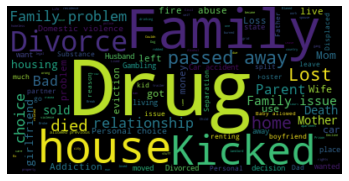

In [ ]:
factors_text = factors_other.str.cat(sep=' ')
wordcloud = WordCloud(stopwords=STOPWORDS).generate(factors_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Chatbots: some history
Regular expressions are so powerful, they can be used creatively to do many things, including making a chatbot.

One of the most famous chatbots ever created is one call ELIZA. Try her out: https://web.njit.edu/~ronkowit/eliza.html

She's famous because of something called the Turing Test, she almost, for about 5 minutes, beat the test. 

What is the Turing Test? It's a foundation of Artificial Intelligence. If you've never seen the Imitation Game, you're missing out. It's a great movie about Alan Turing, one of the visionaries behind the creation of computers. He envisioned a "test" in which a computer could fool a human and thus reach the status of being "intelligent" -- here's a clip of that scene in the movie: https://www.youtube.com/watch?v=lTMEUA6VnJE


# Chatbots: Chatty the bot

Let's make our own chatbot! Let's start with a sample, play with it, and make it better.

In [ ]:
from nltk.chat.util import Chat, reflections

reflections = {
  "i am"       : "you are",
  "i was"      : "you were",
  "i"          : "you",
  "i'm"        : "you are",
  "i'd"        : "you would",
  "i've"       : "you have",
  "i'll"       : "you will",
  "my"         : "your",
  "you are"    : "I am",
  "you were"   : "I was",
  "you've"     : "I have",
  "you'll"     : "I will",
  "your"       : "my",
  "yours"      : "mine",
  "you"        : "me",
  "me"         : "you"
}

pairs = [
   [
      r"my name is (.*)",
      ["Hello %1, How are you today ?",]
   ],
   [
      r".* seen (.*)",
      ["Oh, yea! %1 is the best ever isn't it?", "Oh, ew. %1 totally sucked rocks.", "Really? You want to talk about %1?!"]
   ],
   [
      r"what is your name ?",
      ["My name is Chatty and I'm a chatbot ?",]
   ],
   [
      r"how are you ?",
      ["I'm doing good\nHow about You ?", "I've been better, but thanks for asking.", "I took the vaccine yesterday and I am tired."]
   ],
   [
      r"sorry (.*)",
      ["Its alright","Its OK, never mind","Iie, doitachimashite","Never apologize (is the stupiest thing I've ever heard) -- don't worry about it."]
   ],
   [
      r"i'm (.*) doing good",
      ["Nice to hear that","Alright :)",]
   ],
   [
      r"hi|hey|hello",
      ["Hello", "Hey there",]
   ],
   [
      r"(.*) age?",
      ["I'm a computer program dude\nSeriously you are asking me this?",]
        
   ],
   [
      r"what (.*) want ?",
      ["Make me an offer I can't refuse",]
   ],
   [
      r"(.*) created ?",
      ["Nagesh created me using Python's NLTK library ","top secret ;)",]
   ],
   [
      r"(.*) (location|city) ?",
      ['Chennai, Tamil Nadu',]
   ],
   [
      r"how is weather in (.*)?",
      ["Weather in %1 is awesome like always","Too hot man here in %1","Too cold man here in %1","Never even heard about %1"]
   ],
   [
      r"i work in (.*)?",
      ["%1 is an Amazing company, I have heard about it. But they are in huge loss these days.",]
   ],
   [
      r"(.*)raining in (.*)",
      ["No rain since last week here in %2","Damn its raining too much here in %2"]
   ],
   [
      r"how (.*) health(.*)",
      ["I'm a computer program, so I'm always healthy ",]
   ],
    [
      r"who (.*) sportsperson ?",
      ["Messy","Ronaldo","Roony"]
   ],
   [
      r"(.*) (sports|game) ?",
      ["I'm a very big fan of Football",]
   ],
   [
      r"who (.*) (moviestar|actor)?",
      ["Brad Pitt", "Benedict Cumberbatch"]
   ],
   [
      r"quit",
      ["BBye take care. See you soon :) ","It was nice talking to you. See you soon :)"]
   ],
]
    
def chatty():
   print("Hi, I'm Chatty and I chat alot ;)\nPlease type lowercase English language to start a conversation. Type quit to leave ") #default message at the start
   chat = Chat(pairs, reflections)
   chat.converse()

if __name__ == "__main__":
   chatty()


Hi, I'm Chatty and I chat alot ;)
Please type lowercase English language to start a conversation. Type quit to leave 
>hello
Hello
>it is raining
None
>is it going to rain
None
>is it raining in riverside
No rain since last week here in riverside


KeyboardInterrupt: ignored